In [4]:
import main
import plot_inequality as plot_ineq
import time
import importlib
import io_manager
import numpy as np
importlib.reload(plot_ineq)
#run stuff here
start_time = time.perf_counter()
print("Running main")

# ***** may want to change how trans is generated its redundant in do file.
of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
trans_path = main_path + "input/50p_age_moms/MH_trans_by_MH_clust_age.csv"

do_phi_H_calib = False
myPars, myShocks, sols, sims = main.main_io(main_path, out_folder_name = of_name, 
                                            H_trans_path = trans_path, do_phi_H_calib=do_phi_H_calib)

Running main
*****Running main_io with default out_folder_name*****
Using health transition matrix from: C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/input/50p_age_moms/MH_trans_by_MH_clust_age.csv
Solver ran in 8.214111899998898 seconds
Calibrating with alpha_lab_targ = 0.33496439, w0_mean_targ = 9.4541645, w0_sd_targ = 3.2013602, 
                                        w1_targ = 0.3406973883314617, w2_targ = 0.3031905120658842, wH_targ = 0.035280712, phi_H_target = 0.02408891
***** Calibration iteration 0 *****
***** Calibration iteration 1 *****
***** Calibration iteration 2 *****
***** Calibration iteration 3 *****
***** Calibration iteration 4 *****
***** Calibration iteration 5 *****
***** Calibration iteration 6 *****
***** Calibration iteration 7 *****
***** Calibration iteration 8 *****
***** Calibration iteration 9 *****
***** Calibration iteration 10 *****
***** Calibration iteration 11 *****
***** Calibration iteration 12 

In [5]:
import plot_aggregates as plot_agg
plot_agg.plot_H_trans_H_type(myPars)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Age', ylabel='Probability (%)'>)

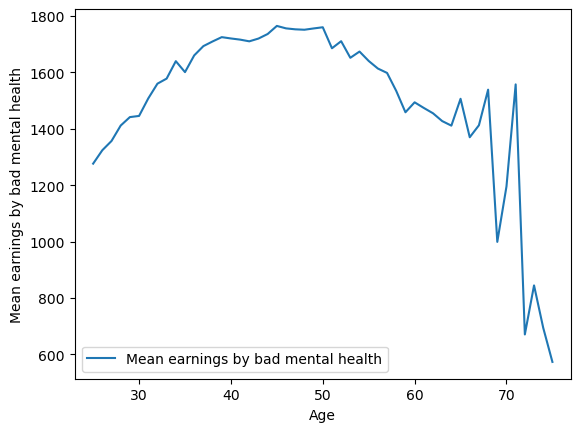

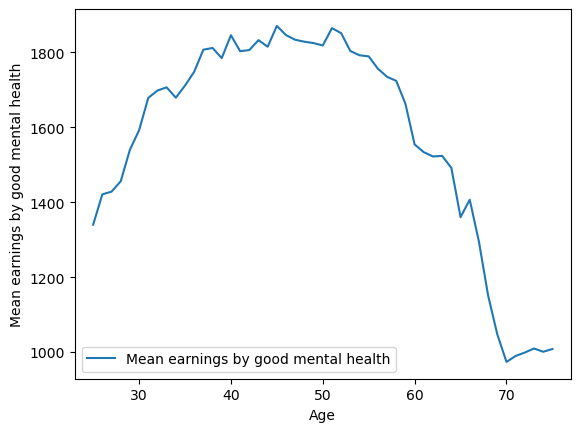

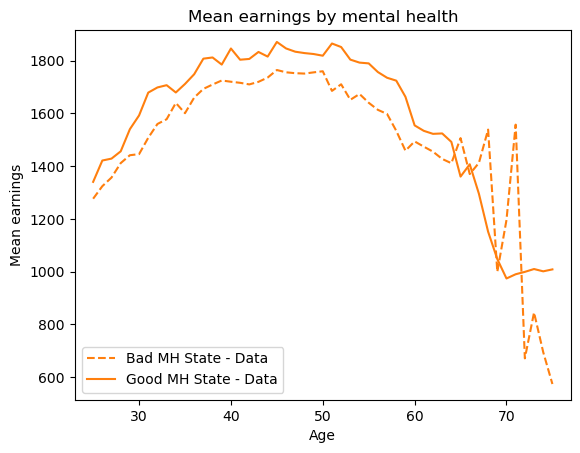

In [6]:
#  Mean earnings by health types/states
# -states first? model and data.
import my_toolbox as tb
import pandas as pd
importlib.reload(tb)

input_path = main_path + "input/50p_age_moms/"
output_path = main_path + "output/plots_by_H_state_type/"

shares_y_lim = [0, 1.0]
label_lists = [["Bad MH State - Data"], ["Good MH State - Data"]]
color_list = ["C1"]
linestyles = ["--", "-"]
age_grid = myPars.age_grid
earnings_data_pd : pd.DataFrame = pd.read_csv(input_path + "mean_earnings_by_health_age.csv") 
# drop last column
earnings_data_pd = earnings_data_pd.iloc[:, :-1]
# rename columns
earnings_data_pd.columns = ["age", "bad_MH", "good_MH"]
earnings_bad_MH_data = earnings_data_pd["bad_MH"].values
earnings_good_MH_data = earnings_data_pd["good_MH"].values
# plot
fig_earn_bad_MH_data, ax_earn_bad_MH_data = tb.plot_lc_mom_by_age(earnings_bad_MH_data, age_grid, "Mean earnings by bad mental health") 
fig_earn_good_MH_data, ax_earn_good_MH_data = tb.plot_lc_mom_by_age(earnings_good_MH_data, age_grid, "Mean earnings by good mental health")
                                                                        
# combine 
fig_comb_earns_by_MH_data, ax_comb_earns_by_MH_data = tb.combine_plots([(fig_earn_bad_MH_data, ax_earn_bad_MH_data), (fig_earn_good_MH_data, ax_earn_good_MH_data)],
                                                                comb_fig_title = "Mean earnings by mental health", x_label = "Age", y_label = "Mean earnings",
                                                                label_lists = label_lists, colors= color_list, linestyles = linestyles,
                                                                save_path = output_path + "mean_earnings_by_MH.pdf")

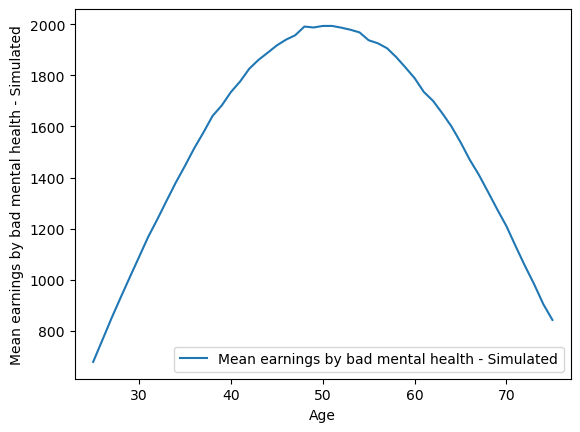

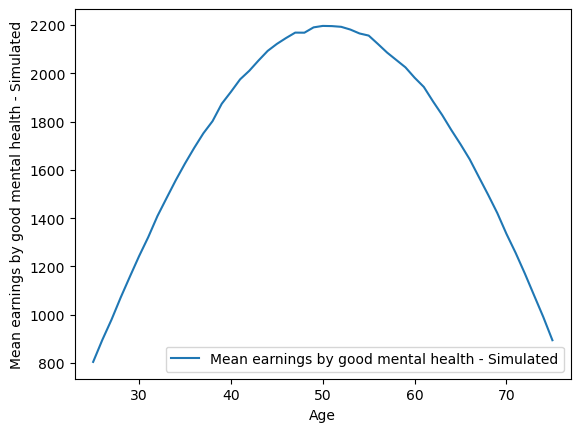

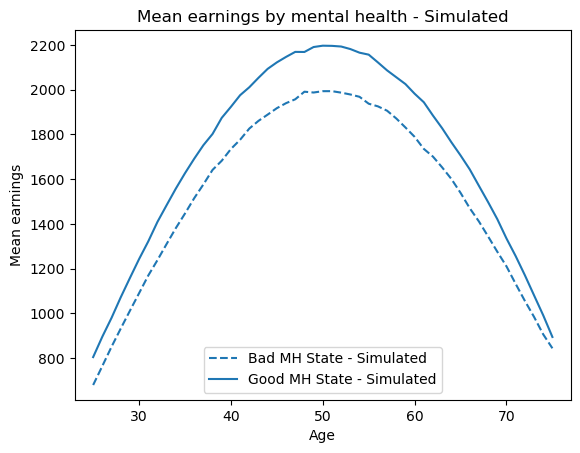

In [7]:
# model
H_hist: np.ndarray = myShocks.H_hist[:, :, :, :myPars.J]
lab_earnings_trim = sims["lab_earnings"][:, :, :, :myPars.J]

good_earnings = lab_earnings_trim * (H_hist == 1) 
bad_earnings = lab_earnings_trim * (H_hist == 0)

# Apply weights to the good_earnings matrix
good_earnings_weighted = good_earnings * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis]
good_earnings_weighted *= myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis]
# Mask zero values with NaN so they are ignored
good_earnings_masked = np.where(good_earnings_weighted != 0, good_earnings_weighted, np.nan)
# Compute the sum of valid weighted earnings (ignoring NaN) along all axes except the last one
sum_good_earnings = np.nansum(good_earnings_masked, axis=tuple(range(good_earnings.ndim - 1)))
# Create a mask of non-zero entries in good_earnings_weighted
non_zero_mask = (good_earnings_weighted != 0)
# Apply the same weights to the mask to get the total weight sum where the earnings were non-zero
total_weights = np.sum(non_zero_mask * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis] * myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis],
                        axis=tuple(range(good_earnings.ndim - 1)))
# Calculate the mean where non-zero entries exist
mean_good_earnings_by_age = np.divide(sum_good_earnings, total_weights, where=total_weights != 0)

# Apply weights to the bad_earnings matrix
bad_earnings_weighted = bad_earnings * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis]
bad_earnings_weighted *= myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis]
# Mask zero values with NaN so they are ignored
bad_earnings_masked = np.where(bad_earnings_weighted != 0, bad_earnings_weighted, np.nan)
# Compute the sum of valid weighted earnings (ignoring NaN) along all axes except the last one
sum_bad_earnings = np.nansum(bad_earnings_masked, axis=tuple(range(bad_earnings.ndim - 1)))
# Create a mask of non-zero entries in bad_earnings_weighted
non_zero_mask = (bad_earnings_weighted != 0)
# Apply the same weights to the mask to get the total weight sum where the earnings were non-zero
total_weights = np.sum(non_zero_mask * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis] *
                       myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis], axis=tuple(range(bad_earnings.ndim - 1)))
# Calculate the mean where non-zero entries exist
mean_bad_earnings_by_age = np.divide(sum_bad_earnings, total_weights, where=total_weights != 0)

# plot
shares_y_lim = [0, 1.0]
label_lists = [["Bad MH State - Simulated"], ["Good MH State - Simulated"]]
color_list = ["C0"]
linestyles = ["--", "-"]
age_grid = myPars.age_grid

fig_earn_bad_MH_sim, ax_earn_bad_MH_sim = tb.plot_lc_mom_by_age(mean_bad_earnings_by_age, age_grid, "Mean earnings by bad mental health - Simulated")
fig_earn_good_MH_sim, ax_earn_good_MH_sim = tb.plot_lc_mom_by_age(mean_good_earnings_by_age, age_grid, "Mean earnings by good mental health - Simulated")

# combine
fig_comb_earns_by_MH_sim, ax_comb_earns_by_MH_sim = tb.combine_plots([(fig_earn_bad_MH_sim, ax_earn_bad_MH_sim), (fig_earn_good_MH_sim, ax_earn_good_MH_sim)],
                                                                comb_fig_title = "Mean earnings by mental health - Simulated", x_label = "Age", y_label = "Mean earnings",
                                                                label_lists = label_lists, colors= color_list, linestyles = linestyles,
                                                                save_path = output_path + "mean_earnings_by_MH_sim.pdf")

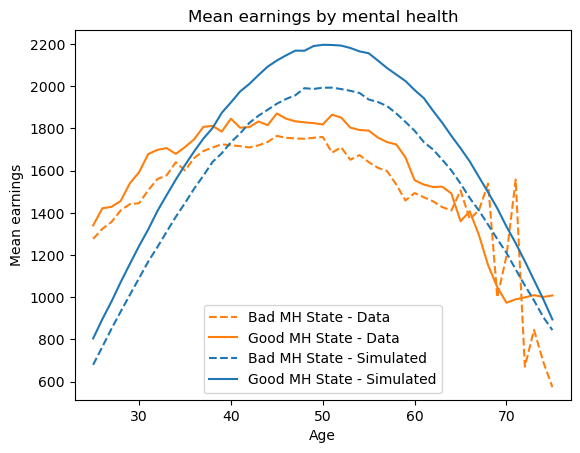

In [8]:
# combine the sim and data plots
fig_comb_earns_by_MH, ax_comb_earns_by_MH = tb.combine_plots([(fig_earn_bad_MH_data, ax_earn_bad_MH_data), (fig_earn_good_MH_data, ax_earn_good_MH_data),
                                                             (fig_earn_bad_MH_sim, ax_earn_bad_MH_sim), (fig_earn_good_MH_sim, ax_earn_good_MH_sim)],
                                                             comb_fig_title = "Mean earnings by mental health", x_label = "Age", y_label = "Mean earnings",
                                                             label_lists = [["Bad MH State - Data"], ["Good MH State - Data"], ["Bad MH State - Simulated"], ["Good MH State - Simulated"]],
                                                             colors= ["C1", "C1", "C0", "C0"], linestyles = ["--", "-", "--", "-"],
                                                             save_path = output_path + "mean_earnings_by_MH_comb.pdf")

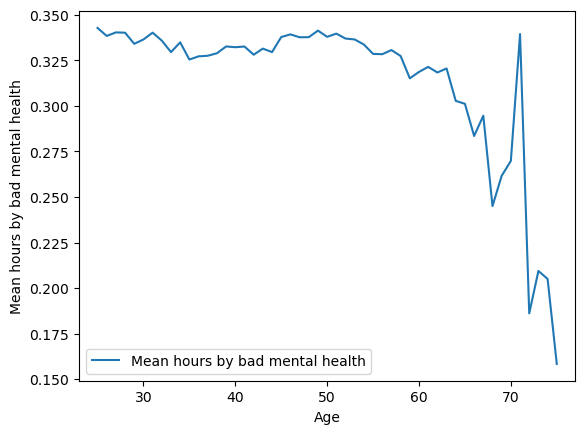

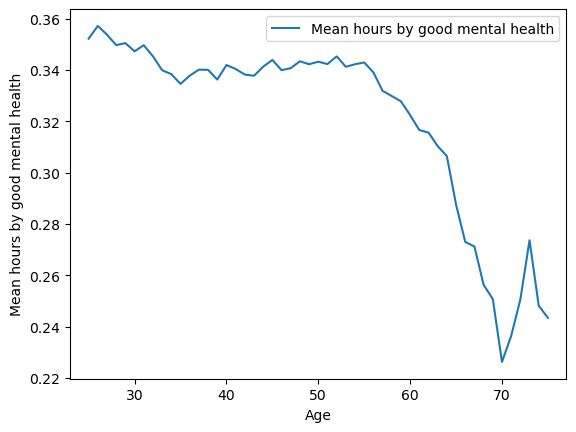

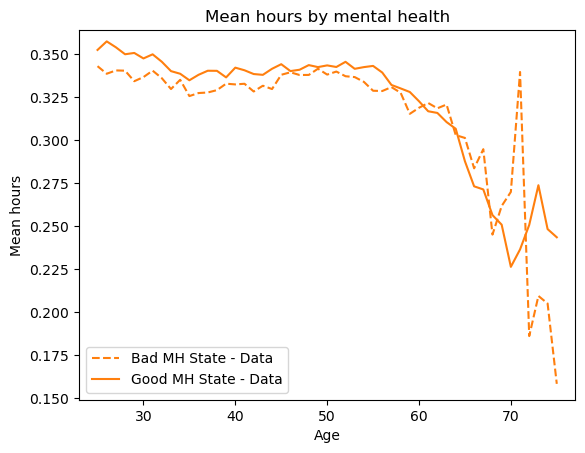

In [9]:
#  Mean wage by health types/states
# -states first? model and data.
import my_toolbox as tb
import pandas as pd
importlib.reload(tb)

input_path = main_path + "input/50p_age_moms/"
output_path = main_path + "output/plots_by_H_state_type/"

shares_y_lim = [0, 1.0]
label_lists = [["Bad MH State - Data"], ["Good MH State - Data"]]
color_list = ["C1"]
linestyles = ["--", "-"]
age_grid = myPars.age_grid
earnings_data_pd : pd.DataFrame = pd.read_csv(input_path + "mean_hours_by_health_age.csv") 
# drop last column
earnings_data_pd = earnings_data_pd.iloc[:, :-1]
# rename columns
earnings_data_pd.columns = ["age", "bad_MH", "good_MH"]
earnings_bad_MH_data = earnings_data_pd["bad_MH"].values
earnings_good_MH_data = earnings_data_pd["good_MH"].values
# plot
fig_earn_bad_MH_data, ax_earn_bad_MH_data = tb.plot_lc_mom_by_age(earnings_bad_MH_data, age_grid, "Mean hours by bad mental health") 
fig_earn_good_MH_data, ax_earn_good_MH_data = tb.plot_lc_mom_by_age(earnings_good_MH_data, age_grid, "Mean hours by good mental health")
                                                                        
# combine 
fig_comb_earns_by_MH_data, ax_comb_earns_by_MH_data = tb.combine_plots([(fig_earn_bad_MH_data, ax_earn_bad_MH_data), (fig_earn_good_MH_data, ax_earn_good_MH_data)],
                                                                comb_fig_title = "Mean hours by mental health", x_label = "Age", y_label = "Mean hours",
                                                                label_lists = label_lists, colors= color_list, linestyles = linestyles,
                                                                save_path = output_path + "mean_hours_by_MH.pdf")

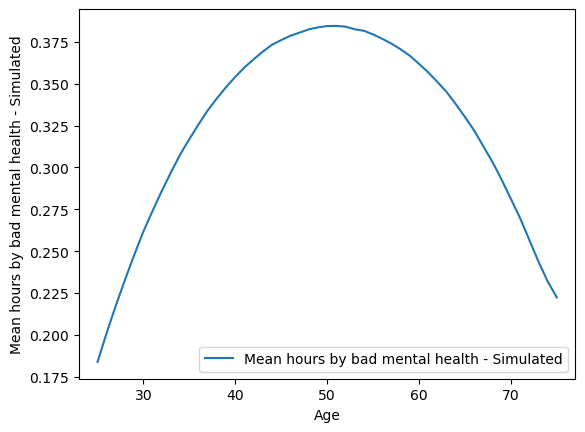

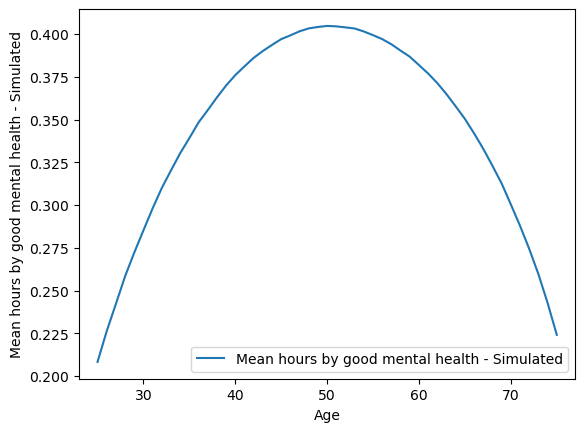

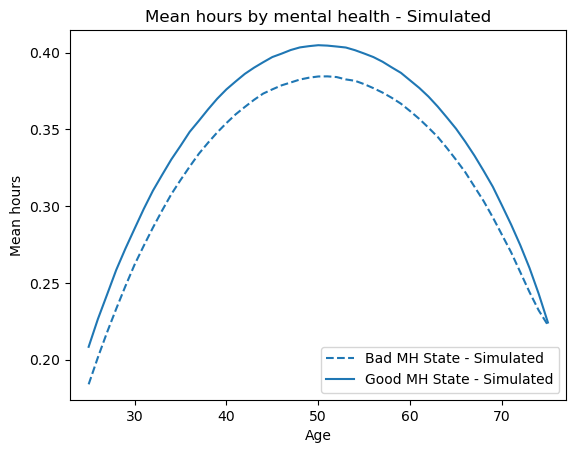

In [10]:
# model
H_hist: np.ndarray = myShocks.H_hist[:, :, :, :myPars.J]
lab_earnings_trim = sims["lab"][:, :, :, :myPars.J]

good_earnings = lab_earnings_trim * (H_hist == 1) 
bad_earnings = lab_earnings_trim * (H_hist == 0)

# Apply weights to the good_earnings matrix
good_earnings_weighted = good_earnings * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis]
good_earnings_weighted *= myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis]
# Mask zero values with NaN so they are ignored
good_earnings_masked = np.where(good_earnings_weighted != 0, good_earnings_weighted, np.nan)
# Compute the sum of valid weighted earnings (ignoring NaN) along all axes except the last one
sum_good_earnings = np.nansum(good_earnings_masked, axis=tuple(range(good_earnings.ndim - 1)))
# Create a mask of non-zero entries in good_earnings_weighted
non_zero_mask = (good_earnings_weighted != 0)
# Apply the same weights to the mask to get the total weight sum where the earnings were non-zero
total_weights = np.sum(non_zero_mask * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis] * myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis],
                        axis=tuple(range(good_earnings.ndim - 1)))
# Calculate the mean where non-zero entries exist
mean_good_earnings_by_age = np.divide(sum_good_earnings, total_weights, where=total_weights != 0)

# Apply weights to the bad_earnings matrix
bad_earnings_weighted = bad_earnings * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis]
bad_earnings_weighted *= myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis]
# Mask zero values with NaN so they are ignored
bad_earnings_masked = np.where(bad_earnings_weighted != 0, bad_earnings_weighted, np.nan)
# Compute the sum of valid weighted earnings (ignoring NaN) along all axes except the last one
sum_bad_earnings = np.nansum(bad_earnings_masked, axis=tuple(range(bad_earnings.ndim - 1)))
# Create a mask of non-zero entries in bad_earnings_weighted
non_zero_mask = (bad_earnings_weighted != 0)
# Apply the same weights to the mask to get the total weight sum where the earnings were non-zero
total_weights = np.sum(non_zero_mask * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis] *
                       myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis], axis=tuple(range(bad_earnings.ndim - 1)))
# Calculate the mean where non-zero entries exist
mean_bad_earnings_by_age = np.divide(sum_bad_earnings, total_weights, where=total_weights != 0)

# plot
shares_y_lim = [0, 1.0]
label_lists = [["Bad MH State - Simulated"], ["Good MH State - Simulated"]]
color_list = ["C0"]
linestyles = ["--", "-"]
age_grid = myPars.age_grid

fig_earn_bad_MH_sim, ax_earn_bad_MH_sim = tb.plot_lc_mom_by_age(mean_bad_earnings_by_age, age_grid, "Mean hours by bad mental health - Simulated")
fig_earn_good_MH_sim, ax_earn_good_MH_sim = tb.plot_lc_mom_by_age(mean_good_earnings_by_age, age_grid, "Mean hours by good mental health - Simulated")

# combine
fig_comb_earns_by_MH_sim, ax_comb_earns_by_MH_sim = tb.combine_plots([(fig_earn_bad_MH_sim, ax_earn_bad_MH_sim), (fig_earn_good_MH_sim, ax_earn_good_MH_sim)],
                                                                comb_fig_title = "Mean hours by mental health - Simulated", x_label = "Age", y_label = "Mean hours",
                                                                label_lists = label_lists, colors= color_list, linestyles = linestyles,
                                                                save_path = output_path + "mean_hours_by_MH_sim.pdf")

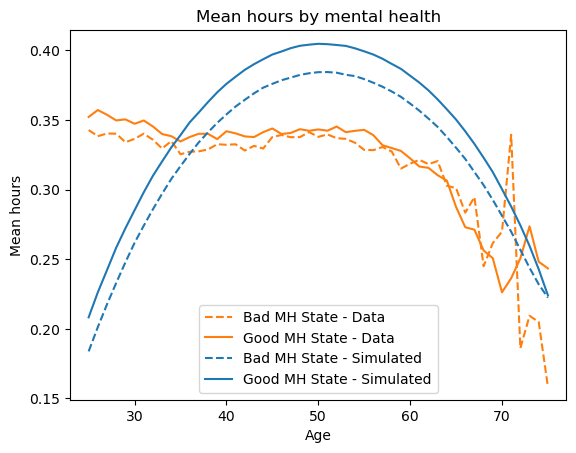

In [11]:

# combine the sim and data plots
fig_comb_earns_by_MH, ax_comb_earns_by_MH = tb.combine_plots([(fig_earn_bad_MH_data, ax_earn_bad_MH_data), (fig_earn_good_MH_data, ax_earn_good_MH_data),
                                                             (fig_earn_bad_MH_sim, ax_earn_bad_MH_sim), (fig_earn_good_MH_sim, ax_earn_good_MH_sim)],
                                                             comb_fig_title = "Mean hours by mental health", x_label = "Age", y_label = "Mean hours",
                                                             label_lists = [["Bad MH State - Data"], ["Good MH State - Data"], ["Bad MH State - Simulated"], ["Good MH State - Simulated"]],
                                                             colors= ["C1", "C1", "C0", "C0"], linestyles = ["--", "-", "--", "-"],
                                                             save_path = output_path + "mean_hours_by_MH_comb.pdf")

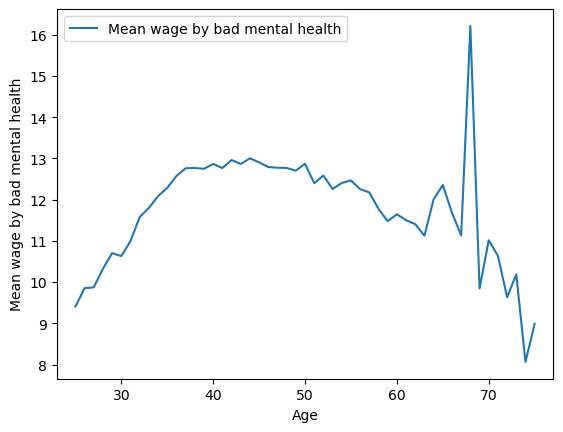

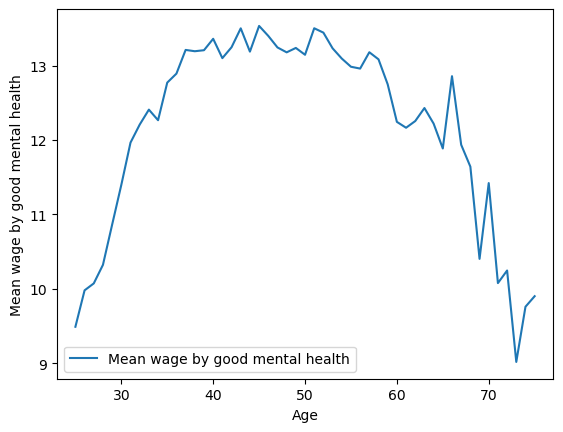

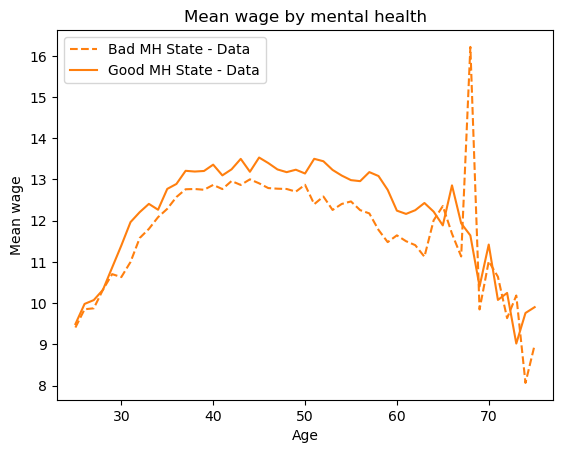

In [12]:
#  Mean wage by health types/states
# -states first? model and data.
import my_toolbox as tb
import pandas as pd
importlib.reload(tb)

input_path = main_path + "input/50p_age_moms/"
output_path = main_path + "output/plots_by_H_state_type/"

shares_y_lim = [0, 1.0]
label_lists = [["Bad MH State - Data"], ["Good MH State - Data"]]
color_list = ["C1"]
linestyles = ["--", "-"]
age_grid = myPars.age_grid
earnings_data_pd : pd.DataFrame = pd.read_csv(input_path + "mean_wage_by_health_age.csv") 
# drop last column
earnings_data_pd = earnings_data_pd.iloc[:, :-1]
# rename columns
earnings_data_pd.columns = ["age", "bad_MH", "good_MH"]
earnings_bad_MH_data = earnings_data_pd["bad_MH"].values
earnings_good_MH_data = earnings_data_pd["good_MH"].values
# plot
fig_earn_bad_MH_data, ax_earn_bad_MH_data = tb.plot_lc_mom_by_age(earnings_bad_MH_data, age_grid, "Mean wage by bad mental health") 
fig_earn_good_MH_data, ax_earn_good_MH_data = tb.plot_lc_mom_by_age(earnings_good_MH_data, age_grid, "Mean wage by good mental health")
                                                                        
# combine 
fig_comb_earns_by_MH_data, ax_comb_earns_by_MH_data = tb.combine_plots([(fig_earn_bad_MH_data, ax_earn_bad_MH_data), (fig_earn_good_MH_data, ax_earn_good_MH_data)],
                                                                comb_fig_title = "Mean wage by mental health", x_label = "Age", y_label = "Mean wage",
                                                                label_lists = label_lists, colors= color_list, linestyles = linestyles,
                                                                save_path = output_path + "mean_wage_by_MH.pdf")

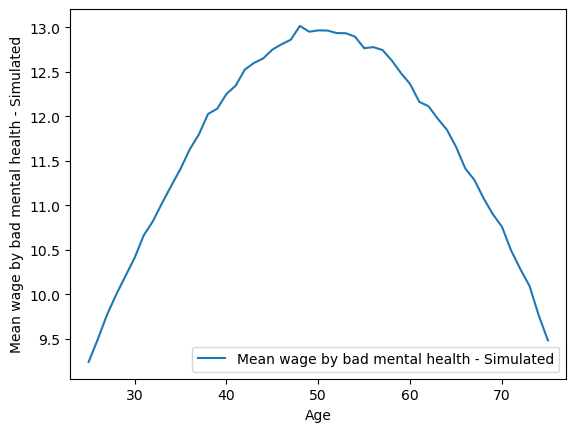

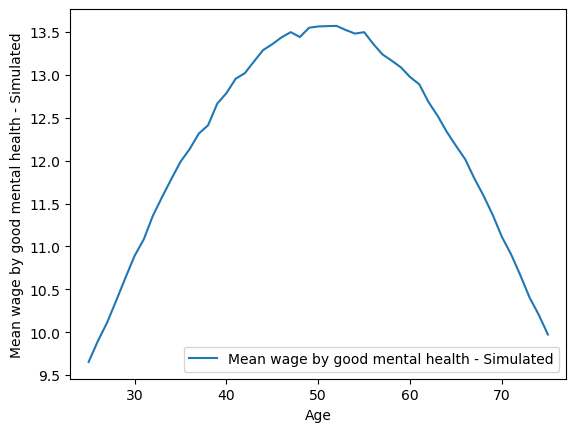

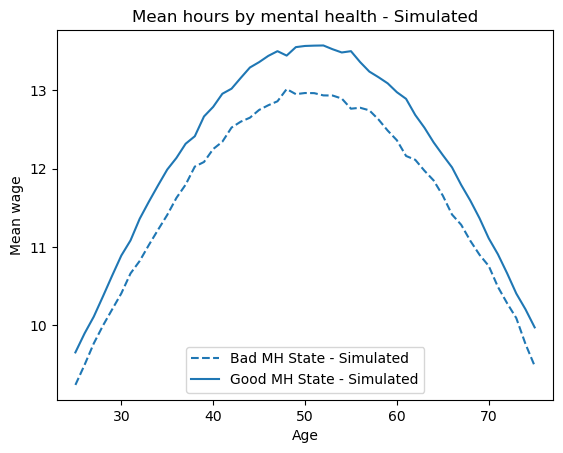

In [13]:
import model_uncert as model
from pars_shocks import Pars, Shocks
# model
H_hist: np.ndarray = myShocks.H_hist[:, :, :, :myPars.J]
# lab_earnings_trim = sims[""][:, :, :, :myPars.J]
lab_earnings_trim = model.gen_wage_hist(myPars, myShocks)[:, :, :, :myPars.J] 

good_earnings = lab_earnings_trim * (H_hist == 1) 
bad_earnings = lab_earnings_trim * (H_hist == 0)

# Apply weights to the good_earnings matrix
good_earnings_weighted = good_earnings * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis]
good_earnings_weighted *= myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis]
# Mask zero values with NaN so they are ignored
good_earnings_masked = np.where(good_earnings_weighted != 0, good_earnings_weighted, np.nan)
# Compute the sum of valid weighted earnings (ignoring NaN) along all axes except the last one
sum_good_earnings = np.nansum(good_earnings_masked, axis=tuple(range(good_earnings.ndim - 1)))
# Create a mask of non-zero entries in good_earnings_weighted
non_zero_mask = (good_earnings_weighted != 0)
# Apply the same weights to the mask to get the total weight sum where the earnings were non-zero
total_weights = np.sum(non_zero_mask * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis] * myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis],
                        axis=tuple(range(good_earnings.ndim - 1)))
# Calculate the mean where non-zero entries exist
mean_good_earnings_by_age = np.divide(sum_good_earnings, total_weights, where=total_weights != 0)

# Apply weights to the bad_earnings matrix
bad_earnings_weighted = bad_earnings * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis]
bad_earnings_weighted *= myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis]
# Mask zero values with NaN so they are ignored
bad_earnings_masked = np.where(bad_earnings_weighted != 0, bad_earnings_weighted, np.nan)
# Compute the sum of valid weighted earnings (ignoring NaN) along all axes except the last one
sum_bad_earnings = np.nansum(bad_earnings_masked, axis=tuple(range(bad_earnings.ndim - 1)))
# Create a mask of non-zero entries in bad_earnings_weighted
non_zero_mask = (bad_earnings_weighted != 0)
# Apply the same weights to the mask to get the total weight sum where the earnings were non-zero
total_weights = np.sum(non_zero_mask * myPars.lab_fe_weights[:, np.newaxis, np.newaxis, np.newaxis] *
                       myPars.H_type_perm_weights[np.newaxis, :, np.newaxis, np.newaxis], axis=tuple(range(bad_earnings.ndim - 1)))
# Calculate the mean where non-zero entries exist
mean_bad_earnings_by_age = np.divide(sum_bad_earnings, total_weights, where=total_weights != 0)

# plot
shares_y_lim = [0, 1.0]
label_lists = [["Bad MH State - Simulated"], ["Good MH State - Simulated"]]
color_list = ["C0"]
linestyles = ["--", "-"]
age_grid = myPars.age_grid

fig_earn_bad_MH_sim, ax_earn_bad_MH_sim = tb.plot_lc_mom_by_age(mean_bad_earnings_by_age, age_grid, "Mean wage by bad mental health - Simulated")
fig_earn_good_MH_sim, ax_earn_good_MH_sim = tb.plot_lc_mom_by_age(mean_good_earnings_by_age, age_grid, "Mean wage by good mental health - Simulated")

# combine
fig_comb_earns_by_MH_sim, ax_comb_earns_by_MH_sim = tb.combine_plots([(fig_earn_bad_MH_sim, ax_earn_bad_MH_sim), (fig_earn_good_MH_sim, ax_earn_good_MH_sim)],
                                                                comb_fig_title = "Mean hours by mental health - Simulated", x_label = "Age", y_label = "Mean wage",
                                                                label_lists = label_lists, colors= color_list, linestyles = linestyles,
                                                                save_path = output_path + "mean_wage_by_MH_sim.pdf")

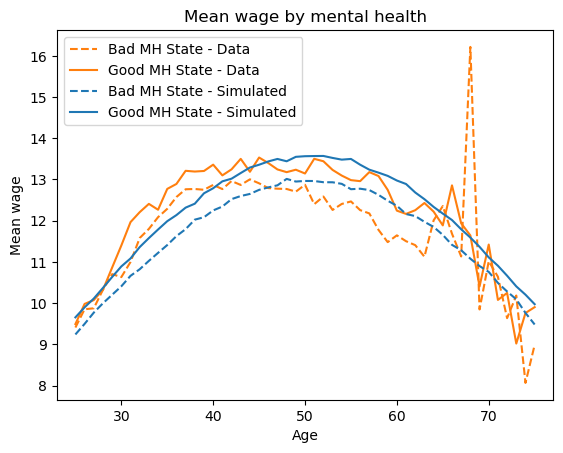

In [14]:

# combine the sim and data plots
fig_comb_earns_by_MH, ax_comb_earns_by_MH = tb.combine_plots([(fig_earn_bad_MH_data, ax_earn_bad_MH_data), (fig_earn_good_MH_data, ax_earn_good_MH_data),
                                                             (fig_earn_bad_MH_sim, ax_earn_bad_MH_sim), (fig_earn_good_MH_sim, ax_earn_good_MH_sim)],
                                                             comb_fig_title = "Mean wage by mental health", x_label = "Age", y_label = "Mean wage",
                                                             label_lists = [["Bad MH State - Data"], ["Good MH State - Data"], ["Bad MH State - Simulated"], ["Good MH State - Simulated"]],
                                                             colors= ["C1", "C1", "C0", "C0"], linestyles = ["--", "-", "--", "-"],
                                                             save_path = output_path + "mean_wage_by_MH_comb.pdf")

   age  mean_MH_type
0   25      0.430063
1   26      0.418928
2   27      0.436906
3   28      0.446360
4   29      0.448870


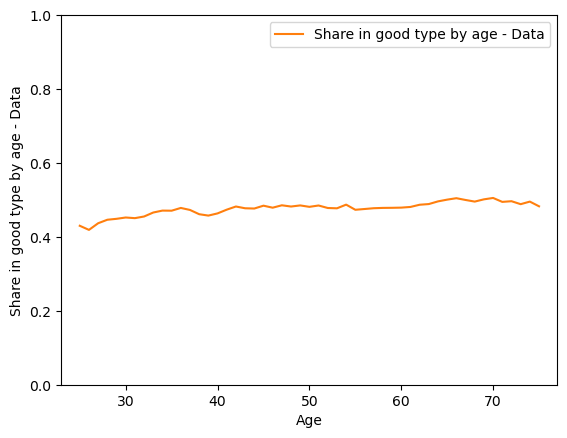

In [23]:
import pandas as pd
importlib.reload(tb)

y_lim = [0, 1.0]

share_MH_type_pd : pd.DataFrame = pd.read_csv(input_path + "share_MH_type_age.csv") 
share_MH_type_pd.columns = ["age", "mean_MH_type"]
print(share_MH_type_pd.head())
share_MH_type_data = share_MH_type_pd["mean_MH_type"].values
save_path = output_path + "share_MH_type_data.pdf"
fig_share_MH_type_data, ax_share_MH_type_data = tb.plot_lc_mom_by_age(share_MH_type_data, age_grid, "Share in good type by age - Data",
                                                                      y_lim = y_lim, save_path = save_path, color = "C1")